# Introduction

This notebook takes the raw downloaded historical weather data and turns it into a clean dataset with a complete date range and missing values filled.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# Data import

In [2]:
raw_data = pd.read_csv('data/Historical weather/Historical to 2022-08-29/Meteostat historical data.gz')

In [3]:
raw_data

,time,City,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
0,2013-01-01 00:00:00,Montpellier,8.0,6.5,90.0,NaN,NaN,50.0,16.6,NaN,1017.1,NaN
1,2013-01-01 01:00:00,Montpellier,8.9,7.3,90.0,0.0,NaN,60.0,22.3,NaN,1015.7,NaN
2,2013-01-01 02:00:00,Montpellier,9.1,7.4,89.0,0.0,NaN,60.0,24.1,NaN,1015.2,NaN
3,2013-01-01 03:00:00,Montpellier,9.4,7.7,89.0,NaN,NaN,80.0,16.6,NaN,1014.8,NaN
4,2013-01-01 04:00:00,Montpellier,12.3,7.8,74.0,0.0,NaN,140.0,22.3,NaN,1014.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169200,2022-08-29 19:00:00,Marseille,26.0,23.1,84.0,0.0,NaN,200.0,7.0,16.7,1017.0,2.0
169201,2022-08-29 20:00:00,Marseille,25.0,23.1,89.0,0.0,NaN,130.0,7.0,16.7,1017.0,2.0
169202,2022-08-29 21:00:00,Marseille,24.7,22.6,88.0,0.0,0.0,130.0,8.0,11.0,1017.0,2.0
169203,2022-08-29 22:00:00,Marseille,25.0,23.1,89.0,0.0,NaN,210.0,4.0,14.8,1017.0,4.0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169205 entries, 0 to 169204
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    169205 non-null  object 
 1   City    169205 non-null  object 
 2   temp    169111 non-null  float64
 3   dwpt    169102 non-null  float64
 4   rhum    169102 non-null  float64
 5   prcp    127335 non-null  float64
 6   snow    17555 non-null   float64
 7   wdir    167108 non-null  float64
 8   wspd    169161 non-null  float64
 9   wpgt    74477 non-null   float64
 10  pres    168461 non-null  float64
 11  coco    79417 non-null   float64
dtypes: float64(10), object(2)
memory usage: 15.5+ MB


In [5]:
raw_data.describe(include = 'all')

,time,City,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
count,169205,169205,169111.000000,169102.000000,169102.000000,127335.000000,17555.000000,167108.000000,169161.000000,74477.000000,168461.000000,79417.000000
unique,84647,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2013-01-01 00:00:00,Marseille,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,84627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.053092,8.945911,65.693865,0.063997,0.060382,205.715878,15.828364,25.586155,1016.522989,3.575872
std,NaN,NaN,7.522553,6.338068,18.725376,0.803816,3.474676,108.577062,11.084829,14.387328,7.070236,4.063165
min,NaN,NaN,-5.800000,-46.600000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,981.200000,0.000000
25%,NaN,NaN,10.400000,4.600000,52.000000,0.000000,0.000000,120.000000,7.600000,14.800000,1012.800000,1.000000
50%,NaN,NaN,15.700000,9.200000,67.000000,0.000000,0.000000,230.000000,13.000000,22.200000,1016.500000,2.000000
75%,NaN,NaN,21.700000,13.600000,81.000000,0.000000,0.000000,300.000000,22.300000,31.500000,1020.500000,4.000000


We drop the column `coco` as it is a [code](https://dev.meteostat.net/docs/formats.html#weather-condition-codes) representing a general combination indicator.

In [6]:
data_df = raw_data.drop(columns = ['coco'])

We'll use a consistent name and type for the Datetime column for all data.

In [7]:
data_df.rename(columns = {'time' : 'Datetime'}, inplace = True)
data_df['Datetime'] = pd.to_datetime(data_df['Datetime'])

We can drop the first day as we don't have it for the air quality data.

In [8]:
data_df.drop(data_df[data_df['Datetime'] < pd.to_datetime('2013-01-02 00:00:00')].index, inplace = True)

In [9]:
data_df

,Datetime,City,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres
24,2013-01-02 00:00:00,Montpellier,9.4,3.8,68.0,NaN,NaN,340.0,11.2,NaN,1018.4
25,2013-01-02 01:00:00,Montpellier,6.3,3.5,82.0,0.0,NaN,10.0,5.4,NaN,1018.7
26,2013-01-02 02:00:00,Montpellier,7.0,2.5,73.0,0.0,NaN,340.0,13.0,NaN,1019.2
27,2013-01-02 03:00:00,Montpellier,5.1,2.3,82.0,NaN,NaN,340.0,11.2,NaN,1020.0
28,2013-01-02 04:00:00,Montpellier,6.4,1.5,71.0,0.0,NaN,290.0,9.4,NaN,1019.9
...,...,...,...,...,...,...,...,...,...,...,...
169200,2022-08-29 19:00:00,Marseille,26.0,23.1,84.0,0.0,NaN,200.0,7.0,16.7,1017.0
169201,2022-08-29 20:00:00,Marseille,25.0,23.1,89.0,0.0,NaN,130.0,7.0,16.7,1017.0
169202,2022-08-29 21:00:00,Marseille,24.7,22.6,88.0,0.0,0.0,130.0,8.0,11.0,1017.0
169203,2022-08-29 22:00:00,Marseille,25.0,23.1,89.0,0.0,NaN,210.0,4.0,14.8,1017.0


## Duplicates

Confirm we have no dupes...

In [10]:
data_df.duplicated().any()

False

## Feature selection

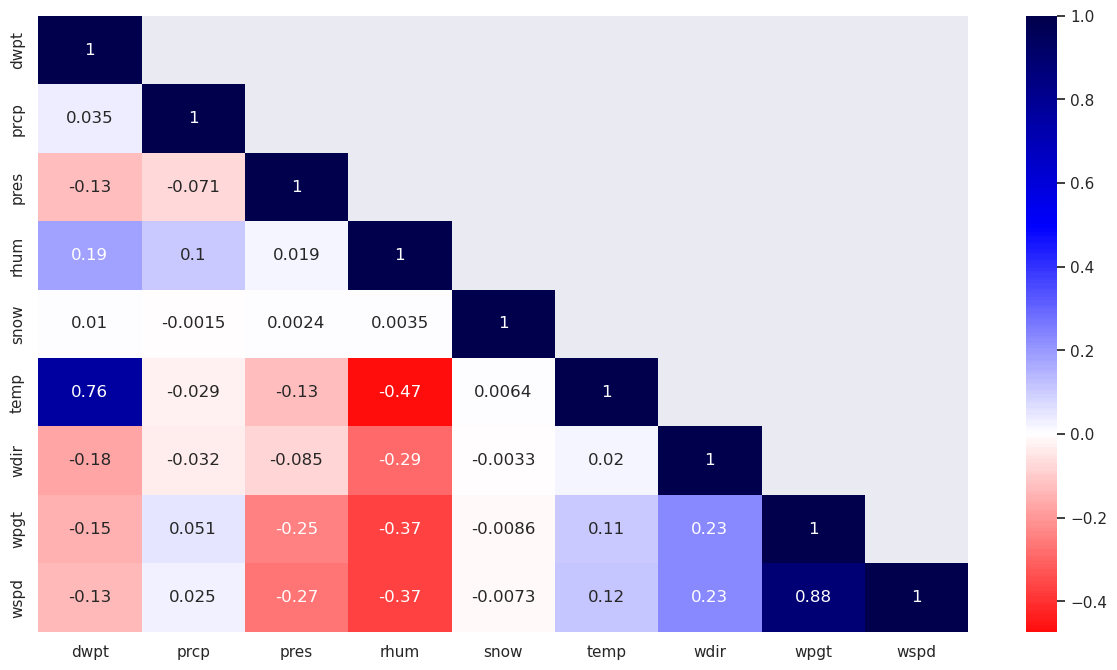

In [11]:
corr_data_df = data_df.pivot_table(
    index = ['City', 'Datetime']
)

sns.set(rc = {'figure.figsize':(15,8)})
correlations = corr_data_df.corr()
mask = np.triu(correlations)
np.fill_diagonal(mask, 0)
heatmap = sns.heatmap(
    correlations,
    cmap = plt.cm.seismic_r,
    annot=True,
    center = 0,
    mask=mask,
)
plt.show()

We drop `wpgt` as it is highly correlated with `wspd`.

In [12]:
data_df.drop(columns = 'wpgt', inplace = True)

## Time coverage

Let's check we have complete data for the date range (2 Jan 2013 to 29 Aug 2022).

In [13]:
# Create a complete datetime range
datetime_range = pd.date_range(start = '2013-01-02', end = '2022-08-29 23:59:59', freq = 'H')

# Create a new empty dataframe with our complete date range
datetime_df = pd.DataFrame(index = datetime_range)
datetime_df.index.name = 'Datetime'

In [14]:
cities = data_df['City'].unique().tolist()

In [15]:
print(f"Dates in full date range: {len(datetime_df)}")
for city in cities:
    print(f"Dates for {city}: {len(data_df[data_df['City'] == city])}")

Dates in full date range: 84648
Dates for Montpellier: 84554
Dates for Marseille: 84603


We're clearly missing some dates so let's fix that.

In [16]:
full_dates_data_df = data_df.pivot_table(
    index = ['City', 'Datetime']
).reindex(
    pd.MultiIndex.from_product([cities, datetime_range])
)
full_dates_data_df.index.set_names('location', level = 0, inplace = True)

# Null

First we check for nulls.

In [17]:
full_dates_data_df.isna().any()

dwpt    True
prcp    True
pres    True
rhum    True
snow    True
temp    True
wdir    True
wspd    True
dtype: bool

All of our features have at least one null value. We'll convert our data into a list so we can then count up the number of null values by day for each feature.

In [18]:
full_dates_data_df.columns.rename('Feature', inplace = True)
data_list = (
    full_dates_data_df.stack(dropna = False)
    .reset_index()
    .rename(columns = {0 : 'Value', 'level_0' : 'City'})
)

In [19]:
data_list

,location,Datetime,Feature,Value
0,Montpellier,2013-01-02 00:00:00,dwpt,3.8
1,Montpellier,2013-01-02 00:00:00,prcp,NaN
2,Montpellier,2013-01-02 00:00:00,pres,1018.4
3,Montpellier,2013-01-02 00:00:00,rhum,68.0
4,Montpellier,2013-01-02 00:00:00,snow,NaN
...,...,...,...,...
1354363,Marseille,2022-08-29 23:00:00,rhum,89.0
1354364,Marseille,2022-08-29 23:00:00,snow,NaN
1354365,Marseille,2022-08-29 23:00:00,temp,24.0
1354366,Marseille,2022-08-29 23:00:00,wdir,120.0


In [20]:
null_values = data_list[data_list['Value'].isna()].copy()
null_values['Date'] = null_values['Datetime'].dt.date

null_values_by_day = null_values.pivot_table(
    index = ['location', 'Feature', 'Date'],
    aggfunc = 'count',
    values = 'Datetime'
).rename(columns = {'Datetime' : 'Nulls'})

In [21]:
null_values_by_day

Nulls
location    Feature Date             
Marseille   dwpt    2013-01-03      1
                    2013-02-28      1
                    2013-06-13      1
                    2013-08-22      1
                    2013-09-13      1
...                               ...
Montpellier wspd    2017-08-15      3
                    2017-09-18      1
                    2018-01-24      1
                    2018-04-11      5
                    2018-06-04      1

[15509 rows x 1 columns]

Let's see how many days we have with more than 12 missing values.

In [22]:
(
    null_values_by_day[null_values_by_day['Nulls'] > 12]
    .groupby(['location', 'Feature'])
    .count()
)

Nulls
location    Feature       
Marseille   prcp        81
            pres        18
            snow      3527
            wdir         1
Montpellier prcp        78
            pres        18
            snow      3527

We need to make a decision for each feature:
- Replace `NaN` values with `0`; OR
- Relace `NaN` values by interpolation; OR
- Drop the feature

Since `snow` and `wpgt` (Wind peak gust) have loads of days with lots of `NaN` values it'll be difficult to assess whether to interpolate or set to zero, as either could be wildly wrong. Since both probably only have weak influence on air quality, it's likely we'll drop these two.

Let's now examine each feature in turn and work out whether they are effectively zeros or missing values. We'll look at the Montpellier data only as a sample.

In [23]:
montpellier_data_df = full_dates_data_df.loc['Montpellier'].copy()

In [24]:
montpellier_data_df

Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2013-01-02 00:00:00,3.8,NaN,1018.4,68.0,NaN,9.4,340.0,11.2
2013-01-02 01:00:00,3.5,0.0,1018.7,82.0,NaN,6.3,10.0,5.4
2013-01-02 02:00:00,2.5,0.0,1019.2,73.0,NaN,7.0,340.0,13.0
2013-01-02 03:00:00,2.3,NaN,1020.0,82.0,NaN,5.1,340.0,11.2
2013-01-02 04:00:00,1.5,0.0,1019.9,71.0,NaN,6.4,290.0,9.4
...,...,...,...,...,...,...,...,...
2022-08-29 19:00:00,24.0,0.0,1016.0,94.0,NaN,25.0,130.0,19.0
2022-08-29 20:00:00,23.1,0.0,1016.0,89.0,NaN,25.0,140.0,15.0
2022-08-29 21:00:00,23.3,0.0,1017.4,89.0,0.0,25.2,170.0,11.0


Now we cycle through each column of data, showing a selection of NaN values (just the first 10) and the values either side.

In [25]:
data_col_headers = montpellier_data_df.columns.values

null_values_analysis = {}

for col_header in data_col_headers:
    
    data_col = montpellier_data_df[col_header]
    analyse_data = pd.DataFrame(data_col[data_col.isna()])
    
    for shift in range(-4, 5):
        analyse_data[shift] = data_col.shift(shift)
        
    null_values_analysis[col_header] = analyse_data.drop(columns = analyse_data.columns[0])
    display(
        null_values_analysis[col_header].head(10)
        .style
        .set_caption(col_header)
        .format(precision = 1)
    )

,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-03 07:00:00,-2.8,-1.6,-2.4,-2.7,nan,-3.1,-3.6,-2.9,-3.1
2013-01-13 06:00:00,0.4,0.2,-0.4,-0.2,nan,1.0,1.3,2.2,2.6
2013-01-24 20:00:00,-3.6,-3.5,-2.8,nan,nan,-1.7,-1.7,-1.9,-2.2
2013-01-24 21:00:00,-3.9,-3.6,-3.5,-2.8,nan,nan,-1.7,-1.7,-1.9
2013-02-11 02:00:00,1.8,2.2,2.2,2.1,nan,2.1,1.8,1.7,1.6
2013-02-22 15:00:00,-9.1,-8.3,-7.4,-8.0,nan,-8.5,-7.8,-8.5,-8.4
2013-03-23 16:00:00,9.7,9.4,10.2,9.6,nan,9.1,8.9,8.3,7.8
2013-04-04 09:00:00,8.7,9.3,9.1,7.7,nan,6.0,6.7,5.7,6.5
2013-04-04 17:00:00,7.3,7.5,8.4,8.5,nan,8.7,8.4,7.0,8.7


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-02 00:00:00,0.0,nan,0.0,0.0,nan,nan,nan,nan,nan
2013-01-02 03:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,nan
2013-01-02 06:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0
2013-01-02 09:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0
2013-01-02 12:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0
2013-01-02 15:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0
2013-01-02 18:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0
2013-01-02 21:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0
2013-01-03 00:00:00,0.0,nan,0.0,0.0,nan,0.0,0.0,nan,0.0


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-03 07:00:00,1037.8,1038.1,1037.3,1036.9,nan,1035.2,1034.7,1033.9,1033.6
2013-01-13 06:00:00,1009.8,1009.5,1009.3,1009.2,nan,1009.2,1009.7,1011.0,1011.7
2013-01-24 20:00:00,1009.4,1009.3,1008.9,nan,nan,1007.5,1006.5,1005.8,1004.5
2013-01-24 21:00:00,1009.9,1009.4,1009.3,1008.9,nan,nan,1007.5,1006.5,1005.8
2013-01-30 14:00:00,1023.0,1022.6,1022.1,1022.0,nan,1022.8,1023.7,1024.6,1024.6
2013-01-31 07:00:00,1027.9,1027.9,1027.8,nan,nan,1027.9,1027.6,1027.5,1026.7
2013-01-31 08:00:00,1027.1,1027.9,1027.9,1027.8,nan,nan,1027.9,1027.6,1027.5
2013-02-03 22:00:00,1026.0,1026.1,1026.4,1026.5,nan,1026.8,1026.4,1025.9,1025.3
2013-02-07 14:00:00,1016.7,1016.0,1014.9,1014.2,nan,1012.8,1012.4,1012.5,1012.3


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-03 07:00:00,41.0,53.0,60.0,69.0,nan,71.0,70.0,70.0,59.0
2013-01-13 06:00:00,67.0,69.0,69.0,71.0,nan,81.0,81.0,85.0,86.0
2013-01-24 20:00:00,68.0,69.0,65.0,nan,nan,60.0,56.0,53.0,45.0
2013-01-24 21:00:00,63.0,68.0,69.0,65.0,nan,nan,60.0,56.0,53.0
2013-02-11 02:00:00,96.0,96.0,95.0,95.0,nan,91.0,94.0,93.0,93.0
2013-02-22 15:00:00,42.0,40.0,36.0,30.0,nan,29.0,33.0,32.0,34.0
2013-03-23 16:00:00,92.0,87.0,93.0,91.0,nan,85.0,80.0,76.0,74.0
2013-04-04 09:00:00,75.0,73.0,76.0,72.0,nan,74.0,83.0,77.0,82.0
2013-04-04 17:00:00,83.0,82.0,86.0,87.0,nan,85.0,77.0,65.0,75.0


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-02 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 01:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 02:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 03:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 04:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 05:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 06:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 07:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013-01-02 08:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-03 07:00:00,9.9,7.4,4.7,2.4,nan,1.6,1.3,2.0,4.2
2013-01-13 06:00:00,6.1,5.4,4.8,4.6,nan,4.0,4.3,4.5,4.7
2013-01-24 20:00:00,1.7,1.6,3.1,nan,nan,5.5,6.4,7.0,9.1
2013-01-24 21:00:00,2.4,1.7,1.6,3.1,nan,nan,5.5,6.4,7.0
2013-02-11 02:00:00,2.4,2.8,2.9,2.8,nan,3.4,2.7,2.7,2.6
2013-02-22 15:00:00,2.5,4.1,6.6,8.6,nan,8.6,7.4,7.1,6.3
2013-03-23 16:00:00,11.0,11.5,11.3,11.0,nan,11.5,12.3,12.4,12.3
2013-04-04 09:00:00,13.0,14.1,13.2,12.6,nan,10.4,9.4,9.5,9.4
2013-04-04 17:00:00,10.1,10.4,10.6,10.6,nan,11.1,12.3,13.4,13.0


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-03 07:00:00,270.0,300.0,310.0,300.0,nan,310.0,300.0,290.0,300.0
2013-01-04 03:00:00,300.0,240.0,330.0,290.0,nan,290.0,260.0,320.0,270.0
2013-01-06 16:00:00,280.0,360.0,260.0,360.0,nan,100.0,350.0,10.0,10.0
2013-01-07 16:00:00,360.0,20.0,300.0,50.0,nan,220.0,190.0,130.0,10.0
2013-01-07 23:00:00,350.0,360.0,10.0,10.0,nan,30.0,10.0,360.0,20.0
2013-01-08 06:00:00,350.0,340.0,330.0,280.0,nan,330.0,320.0,350.0,360.0
2013-01-12 09:00:00,220.0,160.0,nan,nan,nan,340.0,330.0,280.0,300.0
2013-01-12 10:00:00,200.0,220.0,160.0,nan,nan,nan,340.0,330.0,280.0
2013-01-12 11:00:00,230.0,200.0,220.0,160.0,nan,nan,nan,340.0,330.0


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2013-01-03 07:00:00,7.6,9.4,9.4,13.0,nan,9.4,9.4,7.6,16.6
2013-01-13 06:00:00,11.2,16.6,14.8,16.6,nan,14.8,16.6,16.6,13.0
2013-01-24 20:00:00,13.0,5.4,5.4,nan,nan,13.0,18.4,14.8,22.3
2013-01-24 21:00:00,20.5,13.0,5.4,5.4,nan,nan,13.0,18.4,14.8
2013-02-11 02:00:00,3.6,3.6,3.6,7.6,nan,18.4,29.5,20.5,22.3
2013-02-22 15:00:00,29.5,20.5,16.6,13.0,nan,11.2,14.8,20.5,22.3
2013-03-23 16:00:00,20.5,27.7,24.1,14.8,nan,13.0,14.8,16.6,22.3
2013-04-04 09:00:00,31.3,35.3,33.5,9.4,nan,13.0,13.0,18.4,16.6
2013-04-04 17:00:00,5.4,16.6,14.8,13.0,nan,11.2,14.8,25.9,31.3


For all values apart from `prcp` (Precipation) and `snow` it's clear there are missing values that can be interpolated.

It's also worth noting that it looks like there are errors in the temp data. In the row `2014-01-19 02:00:00` for example we see the temperature frop from 11 degrees to 3 degrees then back up to 13.2 degrees over 4 hours. This seems unlikely and given the surrounding values, the entries of 3 degrees are probably wrong. We will leave as is however intially in the hope that errors are too few to mess up the analysis.

# Invalid values

We'll take a closer look at `prcp`, and `snow` now, by examining those rows where the mean is greater than zero. That means there will be at least one value greater than 0 (and not NaN). We'll also sort those rows by the maximum value that appears in them so that we aren't just looking at values that are only slightly different from zero.

In [26]:
for col_header in ['prcp', 'snow']:
    analyse_data_df = null_values_analysis[col_header]
    non_zeros_df = analyse_data_df[analyse_data_df.mean(axis = 1) > 0].copy()
    non_zeros_df['Max'] = non_zeros_df.max(axis = 1)
    display(
        non_zeros_df
        .sort_values(by = 'Max', ascending = False)
        .head(20)
        .style
        .set_caption(f"{col_header}: {len(non_zeros_df)} rows")
        .format(precision = 1)
    )

,-4,-3,-2,-1,0,1,2,3,4,Max
Datetime,,,,,,,,,,
2014-09-29 18:00:00,0.0,nan,0.4,5.0,nan,5.0,68.0,nan,91.0,91.0
2014-09-29 12:00:00,68.0,nan,91.0,17.0,nan,0.4,2.0,nan,1.0,91.0
2014-09-29 15:00:00,5.0,nan,5.0,68.0,nan,91.0,17.0,nan,0.4,91.0
2015-08-23 11:00:00,nan,85.0,35.0,nan,nan,0.0,nan,0.0,0.0,85.0
2015-08-23 18:00:00,4.0,nan,nan,nan,nan,0.0,28.0,nan,85.0,85.0
2015-08-23 15:00:00,nan,nan,0.0,28.0,nan,85.0,35.0,nan,nan,85.0
2015-08-23 12:00:00,28.0,nan,85.0,35.0,nan,nan,0.0,nan,0.0,85.0
2015-06-12 18:00:00,0.0,nan,0.0,0.0,nan,0.8,0.2,nan,56.0,56.0
2015-06-12 15:00:00,0.0,nan,0.8,0.2,nan,56.0,nan,nan,0.0,56.0


,-4,-3,-2,-1,0,1,2,3,4,Max
Datetime,,,,,,,,,,
2022-06-22 04:00:00,nan,nan,0.0,nan,nan,0.0,nan,nan,30.0,30.0
2022-06-22 02:00:00,0.0,nan,nan,0.0,nan,nan,30.0,nan,nan,30.0
2022-06-22 01:00:00,nan,nan,0.0,nan,nan,30.0,nan,nan,nan,30.0
2022-06-21 23:00:00,0.0,nan,nan,30.0,nan,nan,nan,nan,nan,30.0
2022-06-21 22:00:00,nan,nan,30.0,nan,nan,nan,nan,nan,0.0,30.0
2022-06-21 21:00:00,nan,30.0,nan,nan,nan,nan,nan,0.0,nan,30.0
2022-06-21 20:00:00,30.0,nan,nan,nan,nan,nan,0.0,nan,nan,30.0
2022-06-14 20:00:00,nan,nan,nan,10.0,nan,nan,0.0,nan,nan,10.0
2022-06-14 07:00:00,nan,nan,0.0,nan,nan,0.0,nan,nan,10.0,10.0


Certainly for `prcp` it seems reasonable to interpolate. `snow` seems a little less sure as there are many rows with lots of NaN values, between a zero and a non-zero value. All those NaNs could in fact be zero (e.g., it only snowed for one hour) or they could be non-zero (it snowed for many hours). Given that we are talking about the South of France and there are so few rows, I choose to go with setting them as zeros.

First we set the zeros in the 'snow' column.

In [27]:
full_dates_data_df['snow'] = full_dates_data_df['snow'].fillna(0.0)

Now we can fill the other columns using interpolate - although we must first separate the data by city so we don't interpolate using data from two different cities. This matters because there are NaN values in the first entries for both cities, as shown below:

In [28]:
for city in cities:
    display(
        full_dates_data_df.loc[city].head(1).style
        .set_caption(f"{city} first row")
        .format(precision = 1)
    )
    display(
        full_dates_data_df.loc[city].tail(1).style
        .set_caption(f"{city} last row")
        .format(precision = 1)
    )

Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2013-01-02 00:00:00,3.8,nan,1018.4,68.0,0.0,9.4,340.0,11.2


Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2022-08-29 23:00:00,22.1,0.0,1015.0,89.0,0.0,24.0,100.0,13.0


Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2013-01-02 00:00:00,3.8,nan,1016.8,96.0,0.0,4.4,100.0,1.8


Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2022-08-29 23:00:00,22.1,0.0,1017.0,89.0,0.0,24.0,120.0,9.0


We fill by linear interpolation first.

In [29]:
city_df = {}
for city in cities:
    city_df[city] = (
        full_dates_data_df.loc[city]
        .interpolate(method = 'linear')
    )
    display(
        city_df[city].head(10).style
        .set_caption(city)
        .format(precision = 1)
    )
    display(city_df[city].info())

Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2013-01-02 00:00:00,3.8,nan,1018.4,68.0,0.0,9.4,340.0,11.2
2013-01-02 01:00:00,3.5,0.0,1018.7,82.0,0.0,6.3,10.0,5.4
2013-01-02 02:00:00,2.5,0.0,1019.2,73.0,0.0,7.0,340.0,13.0
2013-01-02 03:00:00,2.3,0.0,1020.0,82.0,0.0,5.1,340.0,11.2
2013-01-02 04:00:00,1.5,0.0,1019.9,71.0,0.0,6.4,290.0,9.4
2013-01-02 05:00:00,1.1,0.0,1020.4,67.0,0.0,6.8,280.0,14.8
2013-01-02 06:00:00,0.5,0.0,1020.7,69.0,0.0,5.7,280.0,11.2
2013-01-02 07:00:00,-0.3,0.0,1021.4,69.0,0.0,4.9,250.0,9.4
2013-01-02 08:00:00,-0.4,0.0,1022.0,64.0,0.0,5.9,240.0,11.2


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84648 entries, 2013-01-02 00:00:00 to 2022-08-29 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dwpt    84648 non-null  float64
 1   prcp    84647 non-null  float64
 2   pres    84648 non-null  float64
 3   rhum    84648 non-null  float64
 4   snow    84648 non-null  float64
 5   temp    84648 non-null  float64
 6   wdir    84648 non-null  float64
 7   wspd    84648 non-null  float64
dtypes: float64(8)
memory usage: 5.8 MB


None

Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2013-01-02 00:00:00,3.8,nan,1016.8,96.0,0.0,4.4,100.0,1.8
2013-01-02 01:00:00,3.4,0.0,1016.9,96.0,0.0,4.0,180.0,3.6
2013-01-02 02:00:00,5.7,0.0,1016.9,91.0,0.0,7.1,310.0,18.4
2013-01-02 03:00:00,4.5,0.0,1016.9,81.0,0.0,7.6,320.0,20.5
2013-01-02 04:00:00,3.5,0.0,1017.0,75.0,0.0,7.7,310.0,22.3
2013-01-02 05:00:00,3.1,0.0,1017.2,74.0,0.0,7.4,310.0,25.9
2013-01-02 06:00:00,3.1,0.0,1017.4,75.0,0.0,7.2,320.0,20.5
2013-01-02 07:00:00,2.8,0.0,1017.6,74.0,0.0,7.1,310.0,24.1
2013-01-02 08:00:00,2.5,0.0,1018.3,69.0,0.0,7.8,320.0,31.3


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84648 entries, 2013-01-02 00:00:00 to 2022-08-29 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dwpt    84648 non-null  float64
 1   prcp    84647 non-null  float64
 2   pres    84648 non-null  float64
 3   rhum    84648 non-null  float64
 4   snow    84648 non-null  float64
 5   temp    84648 non-null  float64
 6   wdir    84648 non-null  float64
 7   wspd    84648 non-null  float64
dtypes: float64(8)
memory usage: 5.8 MB


None

We still have a single `NaN` value in `prcp` because the linear interpolation doesn't work when the first value is `NaN`, so let's fix that.

In [30]:
cleaned_city_data = (
    pd.concat([df for df in city_df.values()])
    .fillna(value = 0)
)

In [31]:
cleaned_city_data

Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2013-01-02 00:00:00,3.8,0.0,1018.4,68.0,0.0,9.4,340.0,11.2
2013-01-02 01:00:00,3.5,0.0,1018.7,82.0,0.0,6.3,10.0,5.4
2013-01-02 02:00:00,2.5,0.0,1019.2,73.0,0.0,7.0,340.0,13.0
2013-01-02 03:00:00,2.3,0.0,1020.0,82.0,0.0,5.1,340.0,11.2
2013-01-02 04:00:00,1.5,0.0,1019.9,71.0,0.0,6.4,290.0,9.4
...,...,...,...,...,...,...,...,...
2022-08-29 19:00:00,23.1,0.0,1017.0,84.0,0.0,26.0,200.0,7.0
2022-08-29 20:00:00,23.1,0.0,1017.0,89.0,0.0,25.0,130.0,7.0
2022-08-29 21:00:00,22.6,0.0,1017.0,88.0,0.0,24.7,130.0,8.0


In [32]:
cleaned_city_data = cleaned_city_data.set_index(full_dates_data_df.index)

In [33]:
cleaned_city_data

Feature                          dwpt  prcp    pres  rhum  snow  temp   wdir  \
location    Datetime                                                           
Montpellier 2013-01-02 00:00:00   3.8   0.0  1018.4  68.0   0.0   9.4  340.0   
            2013-01-02 01:00:00   3.5   0.0  1018.7  82.0   0.0   6.3   10.0   
            2013-01-02 02:00:00   2.5   0.0  1019.2  73.0   0.0   7.0  340.0   
            2013-01-02 03:00:00   2.3   0.0  1020.0  82.0   0.0   5.1  340.0   
            2013-01-02 04:00:00   1.5   0.0  1019.9  71.0   0.0   6.4  290.0   
...                               ...   ...     ...   ...   ...   ...    ...   
Marseille   2022-08-29 19:00:00  23.1   0.0  1017.0  84.0   0.0  26.0  200.0   
            2022-08-29 20:00:00  23.1   0.0  1017.0  89.0   0.0  25.0  130.0   
            2022-08-29 21:00:00  22.6   0.0  1017.0  88.0   0.0  24.7  130.0   
            2022-08-29 22:00:00  23.1   0.0  1017.0  89.0   0.0  25.0  210.0   
            2022-08-29 23:00:00  22.1   0.0  1017.0  89.0   0.0  24.0  120.0   

Feature                          wspd  
location    Datetime                   
Montpellier 2013-01-02 00:00:00  11.2  
            2013-01-02 01:00:00   5.4  
            2013-01-02 02:00:00  13.0  
            2013-01-02 03:00:00  11.2  
            2013-01-02 04:00:00   9.4  
...                               ...  
Marseille   2022-08-29 19:00:00   7.0  
            2022-08-29 20:00:00   7.0  
            2022-08-29 21:00:00   8.0  
            2022-08-29 22:00:00   4.0  
            2022-08-29 23:00:00   9.0  

[169296 rows x 8 columns]

# Unusual values

Looks good. Now let's check for any unusual values...

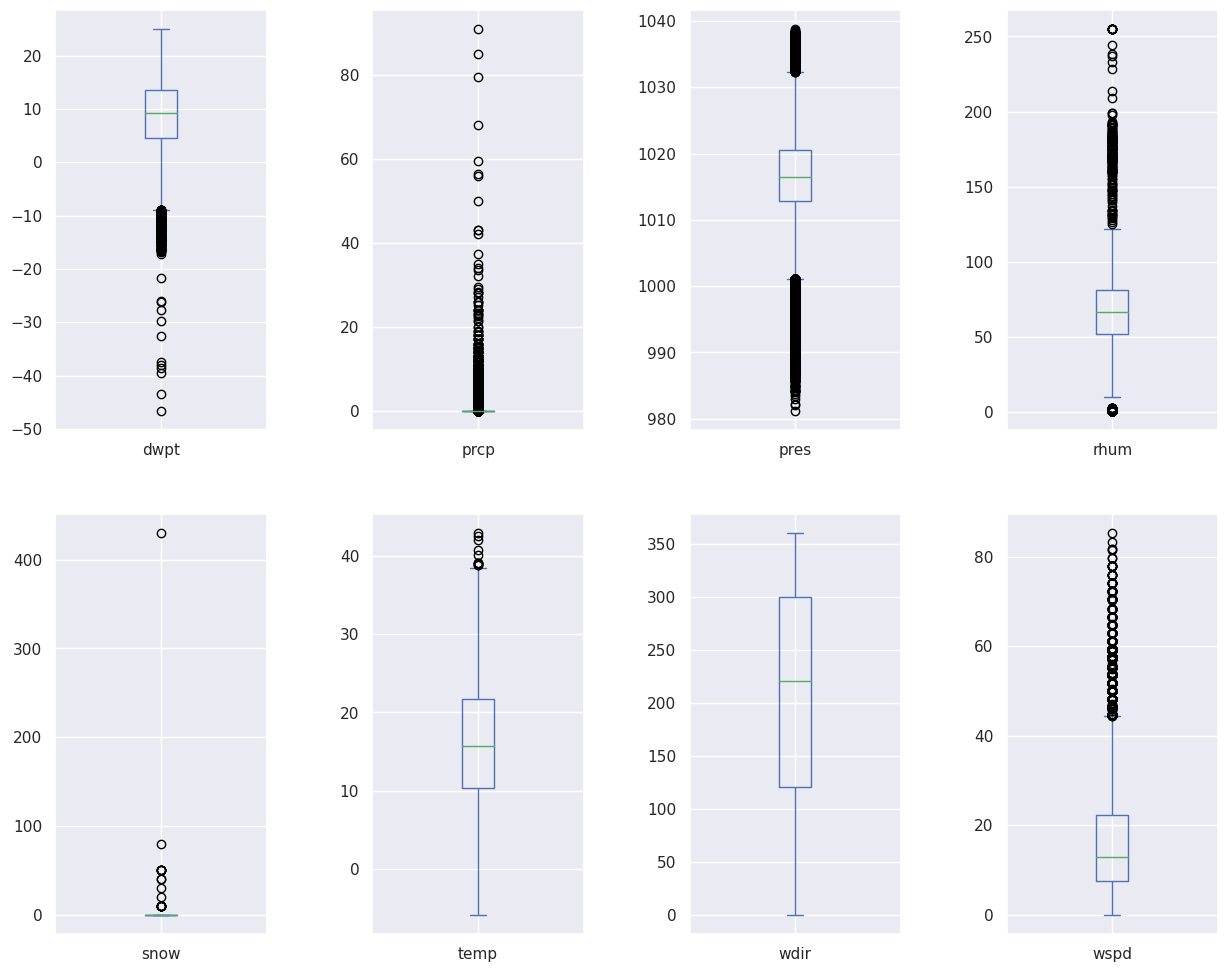

In [34]:
cleaned_city_data.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    figsize = (15, 12),
    layout = (2, 4)
)

plt.subplots_adjust(wspace=0.5) 
plt.show()

These all seem to make sense apart from the single outlier for `snow`, the low values of `dwpt` (dewpoint), and the high values of `rhum` (relative humidity).

We'll deal with `snow` first.

In [35]:
cleaned_city_data[cleaned_city_data['snow'] == cleaned_city_data['snow'].max()]

,Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
location,Datetime,,,,,,,,
Marseille,2022-05-07 21:00:00,12.7,0.0,1017.6,78.0,430.0,16.6,80.0,11.2


We can have a look at the data for that day.

In [36]:
def highlight_snow_greater_than_zero(s):
    if s['snow'] > 0:
        return ['background-color: yellow']*len(s)
    else:
        return ['']*len(s)

marseille_data = cleaned_city_data.loc['Marseille']
    
display(
    marseille_data.loc[pd.to_datetime('2022-05-07 00:00:00') : pd.to_datetime('2022-05-07 23:00:00')]
    .style
    .format(precision = 1)
    .apply(highlight_snow_greater_than_zero, axis = 1)
)

Feature,dwpt,prcp,pres,rhum,snow,temp,wdir,wspd
Datetime,,,,,,,,
2022-05-07 00:00:00,11.7,0.0,1017.0,78.0,0.0,15.5,110.0,7.6
2022-05-07 01:00:00,10.7,0.0,1016.6,77.0,0.0,14.7,80.0,3.6
2022-05-07 02:00:00,10.2,0.0,1016.4,85.0,0.0,12.7,150.0,11.2
2022-05-07 03:00:00,9.7,0.0,1016.4,86.0,0.0,12.0,160.0,7.6
2022-05-07 04:00:00,10.6,0.0,1016.1,88.0,0.0,12.5,130.0,11.2
2022-05-07 05:00:00,10.4,0.0,1016.5,87.0,0.0,12.5,180.0,7.6
2022-05-07 06:00:00,11.8,0.0,1016.6,83.0,0.0,14.7,150.0,3.6
2022-05-07 07:00:00,11.5,0.0,1016.8,68.0,0.0,17.5,340.0,3.6
2022-05-07 08:00:00,11.8,0.0,1017.0,66.0,0.0,18.3,350.0,5.4


The `430` value is clear wrong so we will set it to zero.

In [37]:
cleaned_city_data.at[('Marseille', pd.to_datetime('2022-05-07 21:00:00')), 'snow'] = 0.0

And now dew point. We'll look at the occasions where `dwpt` is less than 10, and compare it with the value before (in time) to see whether it is a sensible delta or not.

In [38]:
cleaned_city_data[cleaned_city_data['dwpt'] < -10]

Feature                          dwpt  prcp    pres  rhum  snow  temp   wdir  \
location    Datetime                                                           
Montpellier 2013-01-17 12:00:00 -10.9   0.0  1009.8  28.0   0.0   6.3  320.0   
            2013-01-17 13:00:00 -11.1   0.0  1009.2  26.0   0.0   7.2  320.0   
            2013-01-17 14:00:00 -10.3   0.0  1009.3  27.0   0.0   7.5   10.0   
            2013-01-17 15:00:00 -11.7   0.0  1009.4  25.0   0.0   7.0  330.0   
            2013-01-17 16:00:00 -12.8   0.0  1009.6  24.0   0.0   6.3  340.0   
...                               ...   ...     ...   ...   ...   ...    ...   
Marseille   2018-08-13 09:00:00 -27.8   0.0  1013.5   2.0   0.0  24.9  100.0   
            2018-08-13 10:00:00 -21.8   0.0  1014.1   3.0   0.0  27.1  270.0   
            2018-08-13 11:00:00 -26.2   0.0  1013.9   2.0   0.0  27.3  180.0   
            2018-08-13 12:00:00 -26.1   0.0  1013.8   2.0   0.0  27.5  190.0   
            2020-05-10 17:00:00 -46.6   6.0  1004.5   1.0   0.0   6.0  100.0   

Feature                          wspd  
location    Datetime                   
Montpellier 2013-01-17 12:00:00  14.8  
            2013-01-17 13:00:00  24.1  
            2013-01-17 14:00:00  22.3  
            2013-01-17 15:00:00  24.1  
            2013-01-17 16:00:00  20.5  
...                               ...  
Marseille   2018-08-13 09:00:00  18.4  
            2018-08-13 10:00:00   9.4  
            2018-08-13 11:00:00  16.6  
            2018-08-13 12:00:00  18.4  
            2020-05-10 17:00:00  14.8  

[264 rows x 8 columns]

In [39]:
dwpt_values_analysis = {}

for location in cities:
    
    data_col = cleaned_city_data.loc[location, 'dwpt']
    analyse_data = pd.DataFrame(data_col.loc[lambda x : x < -20])
    
    for shift in range(-4, 5):
        analyse_data[shift] = data_col.shift(shift)
        
    dwpt_values_analysis[location] = analyse_data.drop(columns = analyse_data.columns[0])
    display(
        dwpt_values_analysis[location]
        .style
        .set_caption(location)
        .format(precision = 1)
    )

,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2020-03-13 02:00:00,11.2,12.1,11.4,12.0,-43.4,11.2,11.4,11.3,11.3
2020-04-20 14:00:00,14.7,15.3,15.6,15.7,-39.5,15.8,15.6,15.2,15.7


,-4,-3,-2,-1,0,1,2,3,4
Datetime,,,,,,,,,
2018-08-13 04:00:00,-29.7,-37.4,-38.0,-38.6,-32.5,20.0,20.2,20.8,21.4
2018-08-13 05:00:00,-27.8,-29.7,-37.4,-38.0,-38.6,-32.5,20.0,20.2,20.8
2018-08-13 06:00:00,-21.8,-27.8,-29.7,-37.4,-38.0,-38.6,-32.5,20.0,20.2
2018-08-13 07:00:00,-26.2,-21.8,-27.8,-29.7,-37.4,-38.0,-38.6,-32.5,20.0
2018-08-13 08:00:00,-26.1,-26.2,-21.8,-27.8,-29.7,-37.4,-38.0,-38.6,-32.5
2018-08-13 09:00:00,18.3,-26.1,-26.2,-21.8,-27.8,-29.7,-37.4,-38.0,-38.6
2018-08-13 10:00:00,18.6,18.3,-26.1,-26.2,-21.8,-27.8,-29.7,-37.4,-38.0
2018-08-13 11:00:00,18.5,18.6,18.3,-26.1,-26.2,-21.8,-27.8,-29.7,-37.4
2018-08-13 12:00:00,19.1,18.5,18.6,18.3,-26.1,-26.2,-21.8,-27.8,-29.7


In [40]:
for location in cities:
    dwpt_delta_analysis = cleaned_city_data.loc[location].copy()
    dwpt_delta_analysis['dwpt - 1h'] = dwpt_delta_analysis['dwpt'].shift(1)
    dwpt_delta_analysis['Delta'] = dwpt_delta_analysis['dwpt'] - dwpt_delta_analysis['dwpt - 1h']
    dwpt_delta_analysis = dwpt_delta_analysis.loc[:, ['dwpt', 'dwpt - 1h', 'Delta']]
    display(
        dwpt_delta_analysis[dwpt_delta_analysis['Delta'].abs() > 10]
        .style.set_caption(location)
        .format(precision = 1)
    )

Feature,dwpt,dwpt - 1h,Delta
Datetime,,,
2014-04-16 14:00:00,7.5,-2.8,10.3
2018-04-01 17:00:00,6.4,-4.2,10.6
2019-09-04 20:00:00,6.6,18.0,-11.4
2020-03-13 02:00:00,-43.4,11.2,-54.6
2020-03-13 03:00:00,12.0,-43.4,55.4
2020-04-20 14:00:00,-39.5,15.8,-55.3
2020-04-20 15:00:00,15.7,-39.5,55.2


Feature,dwpt,dwpt - 1h,Delta
Datetime,,,
2018-08-13 04:00:00,-32.5,20.0,-52.5
2018-08-13 13:00:00,18.3,-26.1,44.4
2020-04-28 02:00:00,13.1,2.9,10.2
2020-05-10 17:00:00,-46.6,15.0,-61.6
2020-05-10 18:00:00,14.4,-46.6,61.0
2020-05-10 19:00:00,4.0,14.4,-10.4
2020-05-11 05:00:00,14.0,2.7,11.3
2020-05-17 00:00:00,15.4,4.7,10.7
2020-05-19 19:00:00,12.0,1.9,10.1


`dwpt` is supposed to represent the dew point in degrees C. However the data we have looks unreliable as we have very low values (in the negative twenties) when the temperature is in the positive twenties. Hard to know what to do here. Simplest options are:
- Set all below -10 to -10
- Set all below -10 to the average of all values.

Both are extremely rough. I chose the latter.

In [41]:
cleaned_city_data.loc[cleaned_city_data['dwpt'] < -10, 'dwpt'] = cleaned_city_data['dwpt'].mean()

Lastly relative humidity.

In [42]:
cleaned_city_data[cleaned_city_data['rhum'] > 100]

Feature                          dwpt  prcp    pres   rhum  snow   temp  \
location    Datetime                                                      
Montpellier 2014-01-19 00:00:00  11.2   0.3   995.4  175.0   0.0   3.00   
            2014-01-19 01:00:00  11.7   0.4   995.1  181.0   0.0   3.00   
            2014-01-19 02:00:00  10.4   0.4   995.4  134.5   0.0   7.00   
            2014-06-15 00:00:00   9.8   0.0  1012.1  160.0   0.0   3.00   
            2014-06-15 01:00:00   9.5   0.0  1011.6  102.5   0.0  12.35   
...                               ...   ...     ...    ...   ...    ...   
Marseille   2020-01-24 08:00:00   6.0   0.0  1023.5  132.0   0.0   2.00   
            2020-01-24 12:00:00   8.8   1.0  1023.5  172.0   0.0   1.00   
            2020-01-26 09:00:00   7.0   0.1  1021.0  152.0   0.0   1.00   
            2020-01-26 10:00:00   7.8   0.2  1021.3  161.0   0.0   1.00   
            2020-01-26 11:00:00   8.4   4.0  1022.2  180.0   0.0   0.00   

Feature                           wdir  wspd  
location    Datetime                          
Montpellier 2014-01-19 00:00:00  170.0  33.5  
            2014-01-19 01:00:00  170.0  31.7  
            2014-01-19 02:00:00  200.0  13.0  
            2014-06-15 00:00:00  290.0  24.1  
            2014-06-15 01:00:00  290.0  22.3  
...                                ...   ...  
Marseille   2020-01-24 08:00:00  100.0   5.4  
            2020-01-24 12:00:00  240.0  20.5  
            2020-01-26 09:00:00   90.0  13.0  
            2020-01-26 10:00:00   80.0  11.2  
            2020-01-26 11:00:00  320.0  13.0  

[209 rows x 8 columns]

In [43]:
cleaned_city_data.loc[cleaned_city_data['rhum'] > 100, 'rhum'] = 100

# Final data

In [44]:
final_data = cleaned_city_data

In [45]:
final_data

Feature                          dwpt  prcp    pres  rhum  snow  temp   wdir  \
location    Datetime                                                           
Montpellier 2013-01-02 00:00:00   3.8   0.0  1018.4  68.0   0.0   9.4  340.0   
            2013-01-02 01:00:00   3.5   0.0  1018.7  82.0   0.0   6.3   10.0   
            2013-01-02 02:00:00   2.5   0.0  1019.2  73.0   0.0   7.0  340.0   
            2013-01-02 03:00:00   2.3   0.0  1020.0  82.0   0.0   5.1  340.0   
            2013-01-02 04:00:00   1.5   0.0  1019.9  71.0   0.0   6.4  290.0   
...                               ...   ...     ...   ...   ...   ...    ...   
Marseille   2022-08-29 19:00:00  23.1   0.0  1017.0  84.0   0.0  26.0  200.0   
            2022-08-29 20:00:00  23.1   0.0  1017.0  89.0   0.0  25.0  130.0   
            2022-08-29 21:00:00  22.6   0.0  1017.0  88.0   0.0  24.7  130.0   
            2022-08-29 22:00:00  23.1   0.0  1017.0  89.0   0.0  25.0  210.0   
            2022-08-29 23:00:00  22.1   0.0  1017.0  89.0   0.0  24.0  120.0   

Feature                          wspd  
location    Datetime                   
Montpellier 2013-01-02 00:00:00  11.2  
            2013-01-02 01:00:00   5.4  
            2013-01-02 02:00:00  13.0  
            2013-01-02 03:00:00  11.2  
            2013-01-02 04:00:00   9.4  
...                               ...  
Marseille   2022-08-29 19:00:00   7.0  
            2022-08-29 20:00:00   7.0  
            2022-08-29 21:00:00   8.0  
            2022-08-29 22:00:00   4.0  
            2022-08-29 23:00:00   9.0  

[169296 rows x 8 columns]

In [46]:
final_data.to_csv('data/Historical weather/Historical to 2022-08-29/Cleaned historical weather data.gz')